In [ ]:
#converting json file us_caegory_id.json to csv
import csv, json

with open('D:\\Data intensive architecture\\US_category_id.json', 'r') as jsonfile:
        us_category=jsonfile.read()
        #print(type(us_category))
        jsonobj = json.loads(us_category)["items"]
        #print(jsonobj)
        
        CSVFile = open('D:\\Data intensive architecture\\us_category.csv', 'w', newline='')
        CSV_writer = csv.writer(CSVFile)
    
#Write CSV Header, If you dont need that, remove this line
CSV_writer.writerow(["kind", "etag", "id", "snippet/channelId", "snippet/title", "snippet/assignable"])

for x in jsonobj:
    #print(x["kind"])
    CSV_writer.writerow([x["kind"],
                        x["etag"],
                        x["id"],
                        x["snippet"]["channelId"],
                        x["snippet"]["title"],
                        x["snippet"]["assignable"]])
CSVFile.close()
    

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import datetime as dt

#reading csv file as dataframe
us_videos= pd.read_csv("D:\\Data intensive architecture\\USvideos.csv")
us_videos.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [3]:
#checking the dimension i.e, number of records
us_videos.shape 

(40949, 16)

In [4]:
#checking NaN value using is.null()
us_videos.isnull().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
dtype: int64

In [17]:
us_videos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
video_id                  40949 non-null object
trending_date             40949 non-null object
title                     40949 non-null object
channel_title             40949 non-null object
category_id               40949 non-null int64
publish_time              40949 non-null object
tags                      40949 non-null object
views                     40949 non-null int64
likes                     40949 non-null int64
dislikes                  40949 non-null int64
comment_count             40949 non-null int64
thumbnail_link            40949 non-null object
comments_disabled         40949 non-null bool
ratings_disabled          40949 non-null bool
video_error_or_removed    40949 non-null bool
description               40379 non-null object
dtypes: bool(3), int64(5), object(8)
memory usage: 4.2+ MB


In [5]:
#reading csv file as dataframe
category=pd.read_csv("D:\\Data intensive architecture\\us_category.csv")
category.head()

,kind,etag,id,snippet/channelId,snippet/title,snippet/assignable
0,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKm...",1,UCBR8-60-B28hp2BmDPdntcQ,Film & Animation,True
1,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/UZ1oLIIz2dxIhO45Z...",2,UCBR8-60-B28hp2BmDPdntcQ,Autos & Vehicles,True
2,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxb...",10,UCBR8-60-B28hp2BmDPdntcQ,Music,True
3,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/HwXKamM1Q20q9BN-o...",15,UCBR8-60-B28hp2BmDPdntcQ,Pets & Animals,True
4,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/9GQMSRjrZdHeb1OEM...",17,UCBR8-60-B28hp2BmDPdntcQ,Sports,True


In [6]:
#checking the dimension i.e, number of records
category.shape

(32, 6)

In [7]:
#checking NaN value using is.null()
category.isnull().sum()

kind                  0
etag                  0
id                    0
snippet/channelId     0
snippet/title         0
snippet/assignable    0
dtype: int64

In [18]:
category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 6 columns):
kind                  32 non-null object
etag                  32 non-null object
category_id           32 non-null int64
snippet/channelId     32 non-null object
snippet/title         32 non-null object
snippet/assignable    32 non-null bool
dtypes: bool(1), int64(1), object(4)
memory usage: 1.4+ KB


In [8]:
#renaming the column id as category_id
print("Before Renaming\n", category.columns)
category.rename(columns = {'id':'category_id'}, inplace = True)
print("After Renaming\n",category.columns)

Before Renaming
 Index(['kind', 'etag', 'id', 'snippet/channelId', 'snippet/title',
       'snippet/assignable'],
      dtype='object')
After Renaming
 Index(['kind', 'etag', 'category_id', 'snippet/channelId', 'snippet/title',
       'snippet/assignable'],
      dtype='object')


In [9]:
#combinging two dataframes using merge
video=pd.merge(us_videos, category, on='category_id')
video.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,kind,etag,snippet/channelId,snippet/title,snippet/assignable
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,...,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/xId8RX7vRN8rqkbYZ...",UCBR8-60-B28hp2BmDPdntcQ,People & Blogs,True
1,0mlNzVSJrT0,17.14.11,Me-O Cats Commercial,Nobrand,22,2017-04-21T06:47:32.000Z,"cute|""cats""|""thai""|""eggs""",98966,2486,184,...,https://i.ytimg.com/vi/0mlNzVSJrT0/default.jpg,False,False,False,Kittens come out of the eggs in a Thai commerc...,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/xId8RX7vRN8rqkbYZ...",UCBR8-60-B28hp2BmDPdntcQ,People & Blogs,True
2,STI2fI7sKMo,17.14.11,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,22,2017-11-11T15:00:03.000Z,"shawn johnson|""andrew east""|""shawn east""|""shaw...",321053,4451,1772,...,https://i.ytimg.com/vi/STI2fI7sKMo/default.jpg,False,False,False,Subscribe for weekly videos ▶ http://bit.ly/sj...,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/xId8RX7vRN8rqkbYZ...",UCBR8-60-B28hp2BmDPdntcQ,People & Blogs,True
3,KODzih-pYlU,17.14.11,BLIND(folded) CAKE DECORATING CONTEST (with Mo...,Grace Helbig,22,2017-11-11T18:08:04.000Z,"itsgrace|""funny""|""comedy""|""vlog""|""grace""|""helb...",197062,7250,217,...,https://i.ytimg.com/vi/KODzih-pYlU/default.jpg,False,False,False,Molly is an god damn amazing human and she cha...,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/xId8RX7vRN8rqkbYZ...",UCBR8-60-B28hp2BmDPdntcQ,People & Blogs,True
4,8mhTWqWlQzU,17.14.11,Wearing Online Dollar Store Makeup For A Week,Safiya Nygaard,22,2017-11-11T01:19:33.000Z,wearing online dollar store makeup for a week|...,2744430,115426,1110,...,https://i.ytimg.com/vi/8mhTWqWlQzU/default.jpg,False,False,False,I found this online dollar store called ShopMi...,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/xId8RX7vRN8rqkbYZ...",UCBR8-60-B28hp2BmDPdntcQ,People & Blogs,True


In [10]:
# Transform trending_date to datetime date format
videos_1= video
videos_1['trending_date'] = pd.to_datetime(video['trending_date'], format='%y.%d.%m').dt.date
videos_1.trending_date.value_counts().sort_index(inplace=True)
videos_1.head()


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,kind,etag,snippet/channelId,snippet/title,snippet/assignable
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,...,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/xId8RX7vRN8rqkbYZ...",UCBR8-60-B28hp2BmDPdntcQ,People & Blogs,True
1,0mlNzVSJrT0,2017-11-14,Me-O Cats Commercial,Nobrand,22,2017-04-21T06:47:32.000Z,"cute|""cats""|""thai""|""eggs""",98966,2486,184,...,https://i.ytimg.com/vi/0mlNzVSJrT0/default.jpg,False,False,False,Kittens come out of the eggs in a Thai commerc...,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/xId8RX7vRN8rqkbYZ...",UCBR8-60-B28hp2BmDPdntcQ,People & Blogs,True
2,STI2fI7sKMo,2017-11-14,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,22,2017-11-11T15:00:03.000Z,"shawn johnson|""andrew east""|""shawn east""|""shaw...",321053,4451,1772,...,https://i.ytimg.com/vi/STI2fI7sKMo/default.jpg,False,False,False,Subscribe for weekly videos ▶ http://bit.ly/sj...,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/xId8RX7vRN8rqkbYZ...",UCBR8-60-B28hp2BmDPdntcQ,People & Blogs,True
3,KODzih-pYlU,2017-11-14,BLIND(folded) CAKE DECORATING CONTEST (with Mo...,Grace Helbig,22,2017-11-11T18:08:04.000Z,"itsgrace|""funny""|""comedy""|""vlog""|""grace""|""helb...",197062,7250,217,...,https://i.ytimg.com/vi/KODzih-pYlU/default.jpg,False,False,False,Molly is an god damn amazing human and she cha...,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/xId8RX7vRN8rqkbYZ...",UCBR8-60-B28hp2BmDPdntcQ,People & Blogs,True
4,8mhTWqWlQzU,2017-11-14,Wearing Online Dollar Store Makeup For A Week,Safiya Nygaard,22,2017-11-11T01:19:33.000Z,wearing online dollar store makeup for a week|...,2744430,115426,1110,...,https://i.ytimg.com/vi/8mhTWqWlQzU/default.jpg,False,False,False,I found this online dollar store called ShopMi...,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/xId8RX7vRN8rqkbYZ...",UCBR8-60-B28hp2BmDPdntcQ,People & Blogs,True


In [11]:
# Transforming publish_time to datetime
publish_time = pd.to_datetime(video.publish_time, format='%Y-%m-%dT%H:%M:%S.%fZ')

# Create Variable publish_date
videos_1['publish_date'] = publish_time.dt.date


# Drop publish_time
videos_1.drop('publish_time',axis=1,inplace=True)
videos_1.head()

,video_id,trending_date,title,channel_title,category_id,tags,views,likes,dislikes,comment_count,...,comments_disabled,ratings_disabled,video_error_or_removed,description,kind,etag,snippet/channelId,snippet/title,snippet/assignable,publish_date
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,SHANtell martin,748374,57527,2966,15954,...,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/xId8RX7vRN8rqkbYZ...",UCBR8-60-B28hp2BmDPdntcQ,People & Blogs,True,2017-11-13
1,0mlNzVSJrT0,2017-11-14,Me-O Cats Commercial,Nobrand,22,"cute|""cats""|""thai""|""eggs""",98966,2486,184,532,...,False,False,False,Kittens come out of the eggs in a Thai commerc...,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/xId8RX7vRN8rqkbYZ...",UCBR8-60-B28hp2BmDPdntcQ,People & Blogs,True,2017-04-21
2,STI2fI7sKMo,2017-11-14,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,22,"shawn johnson|""andrew east""|""shawn east""|""shaw...",321053,4451,1772,895,...,False,False,False,Subscribe for weekly videos ▶ http://bit.ly/sj...,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/xId8RX7vRN8rqkbYZ...",UCBR8-60-B28hp2BmDPdntcQ,People & Blogs,True,2017-11-11
3,KODzih-pYlU,2017-11-14,BLIND(folded) CAKE DECORATING CONTEST (with Mo...,Grace Helbig,22,"itsgrace|""funny""|""comedy""|""vlog""|""grace""|""helb...",197062,7250,217,456,...,False,False,False,Molly is an god damn amazing human and she cha...,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/xId8RX7vRN8rqkbYZ...",UCBR8-60-B28hp2BmDPdntcQ,People & Blogs,True,2017-11-11
4,8mhTWqWlQzU,2017-11-14,Wearing Online Dollar Store Makeup For A Week,Safiya Nygaard,22,wearing online dollar store makeup for a week|...,2744430,115426,1110,6541,...,False,False,False,I found this online dollar store called ShopMi...,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/xId8RX7vRN8rqkbYZ...",UCBR8-60-B28hp2BmDPdntcQ,People & Blogs,True,2017-11-11


In [12]:
# Category ID will be used to assign categories later, it is not a numeric variable.
videos_1.category_id = videos_1.category_id.astype('category')

# Get Metadata Information
videos_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40949 entries, 0 to 40948
Data columns (total 21 columns):
video_id                  40949 non-null object
trending_date             40949 non-null object
title                     40949 non-null object
channel_title             40949 non-null object
category_id               40949 non-null category
tags                      40949 non-null object
views                     40949 non-null int64
likes                     40949 non-null int64
dislikes                  40949 non-null int64
comment_count             40949 non-null int64
thumbnail_link            40949 non-null object
comments_disabled         40949 non-null bool
ratings_disabled          40949 non-null bool
video_error_or_removed    40949 non-null bool
description               40379 non-null object
kind                      40949 non-null object
etag                      40949 non-null object
snippet/channelId         40949 non-null object
snippet/title             40949 non

In [13]:
#dropping the columns which is not used 
videos_2=videos_1.drop(['tags', 'thumbnail_link','snippet/channelId', 'description','kind','etag'], axis=1)
videos_2.head()

,video_id,trending_date,title,channel_title,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,snippet/title,snippet/assignable,publish_date
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,748374,57527,2966,15954,False,False,False,People & Blogs,True,2017-11-13
1,0mlNzVSJrT0,2017-11-14,Me-O Cats Commercial,Nobrand,22,98966,2486,184,532,False,False,False,People & Blogs,True,2017-04-21
2,STI2fI7sKMo,2017-11-14,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,22,321053,4451,1772,895,False,False,False,People & Blogs,True,2017-11-11
3,KODzih-pYlU,2017-11-14,BLIND(folded) CAKE DECORATING CONTEST (with Mo...,Grace Helbig,22,197062,7250,217,456,False,False,False,People & Blogs,True,2017-11-11
4,8mhTWqWlQzU,2017-11-14,Wearing Online Dollar Store Makeup For A Week,Safiya Nygaard,22,2744430,115426,1110,6541,False,False,False,People & Blogs,True,2017-11-11


In [16]:
videos_1.to_csv(r'D:\\Data intensive architecture\\dia.csv', index = False, header=0)

In [1]:
# TO find Correlation
import numpy as np
import pandas as pd
cr=pd.read_csv("D:\\Data intensive architecture\\youtube1.csv")
cr_list=['views','likes','comment_count']
correlation=cr[cr_list].corr()
display(correlation)

,views,likes,comment_count
views,1.000000,0.849177,0.617621
likes,0.849177,1.000000,0.803057
comment_count,0.617621,0.803057,1.000000


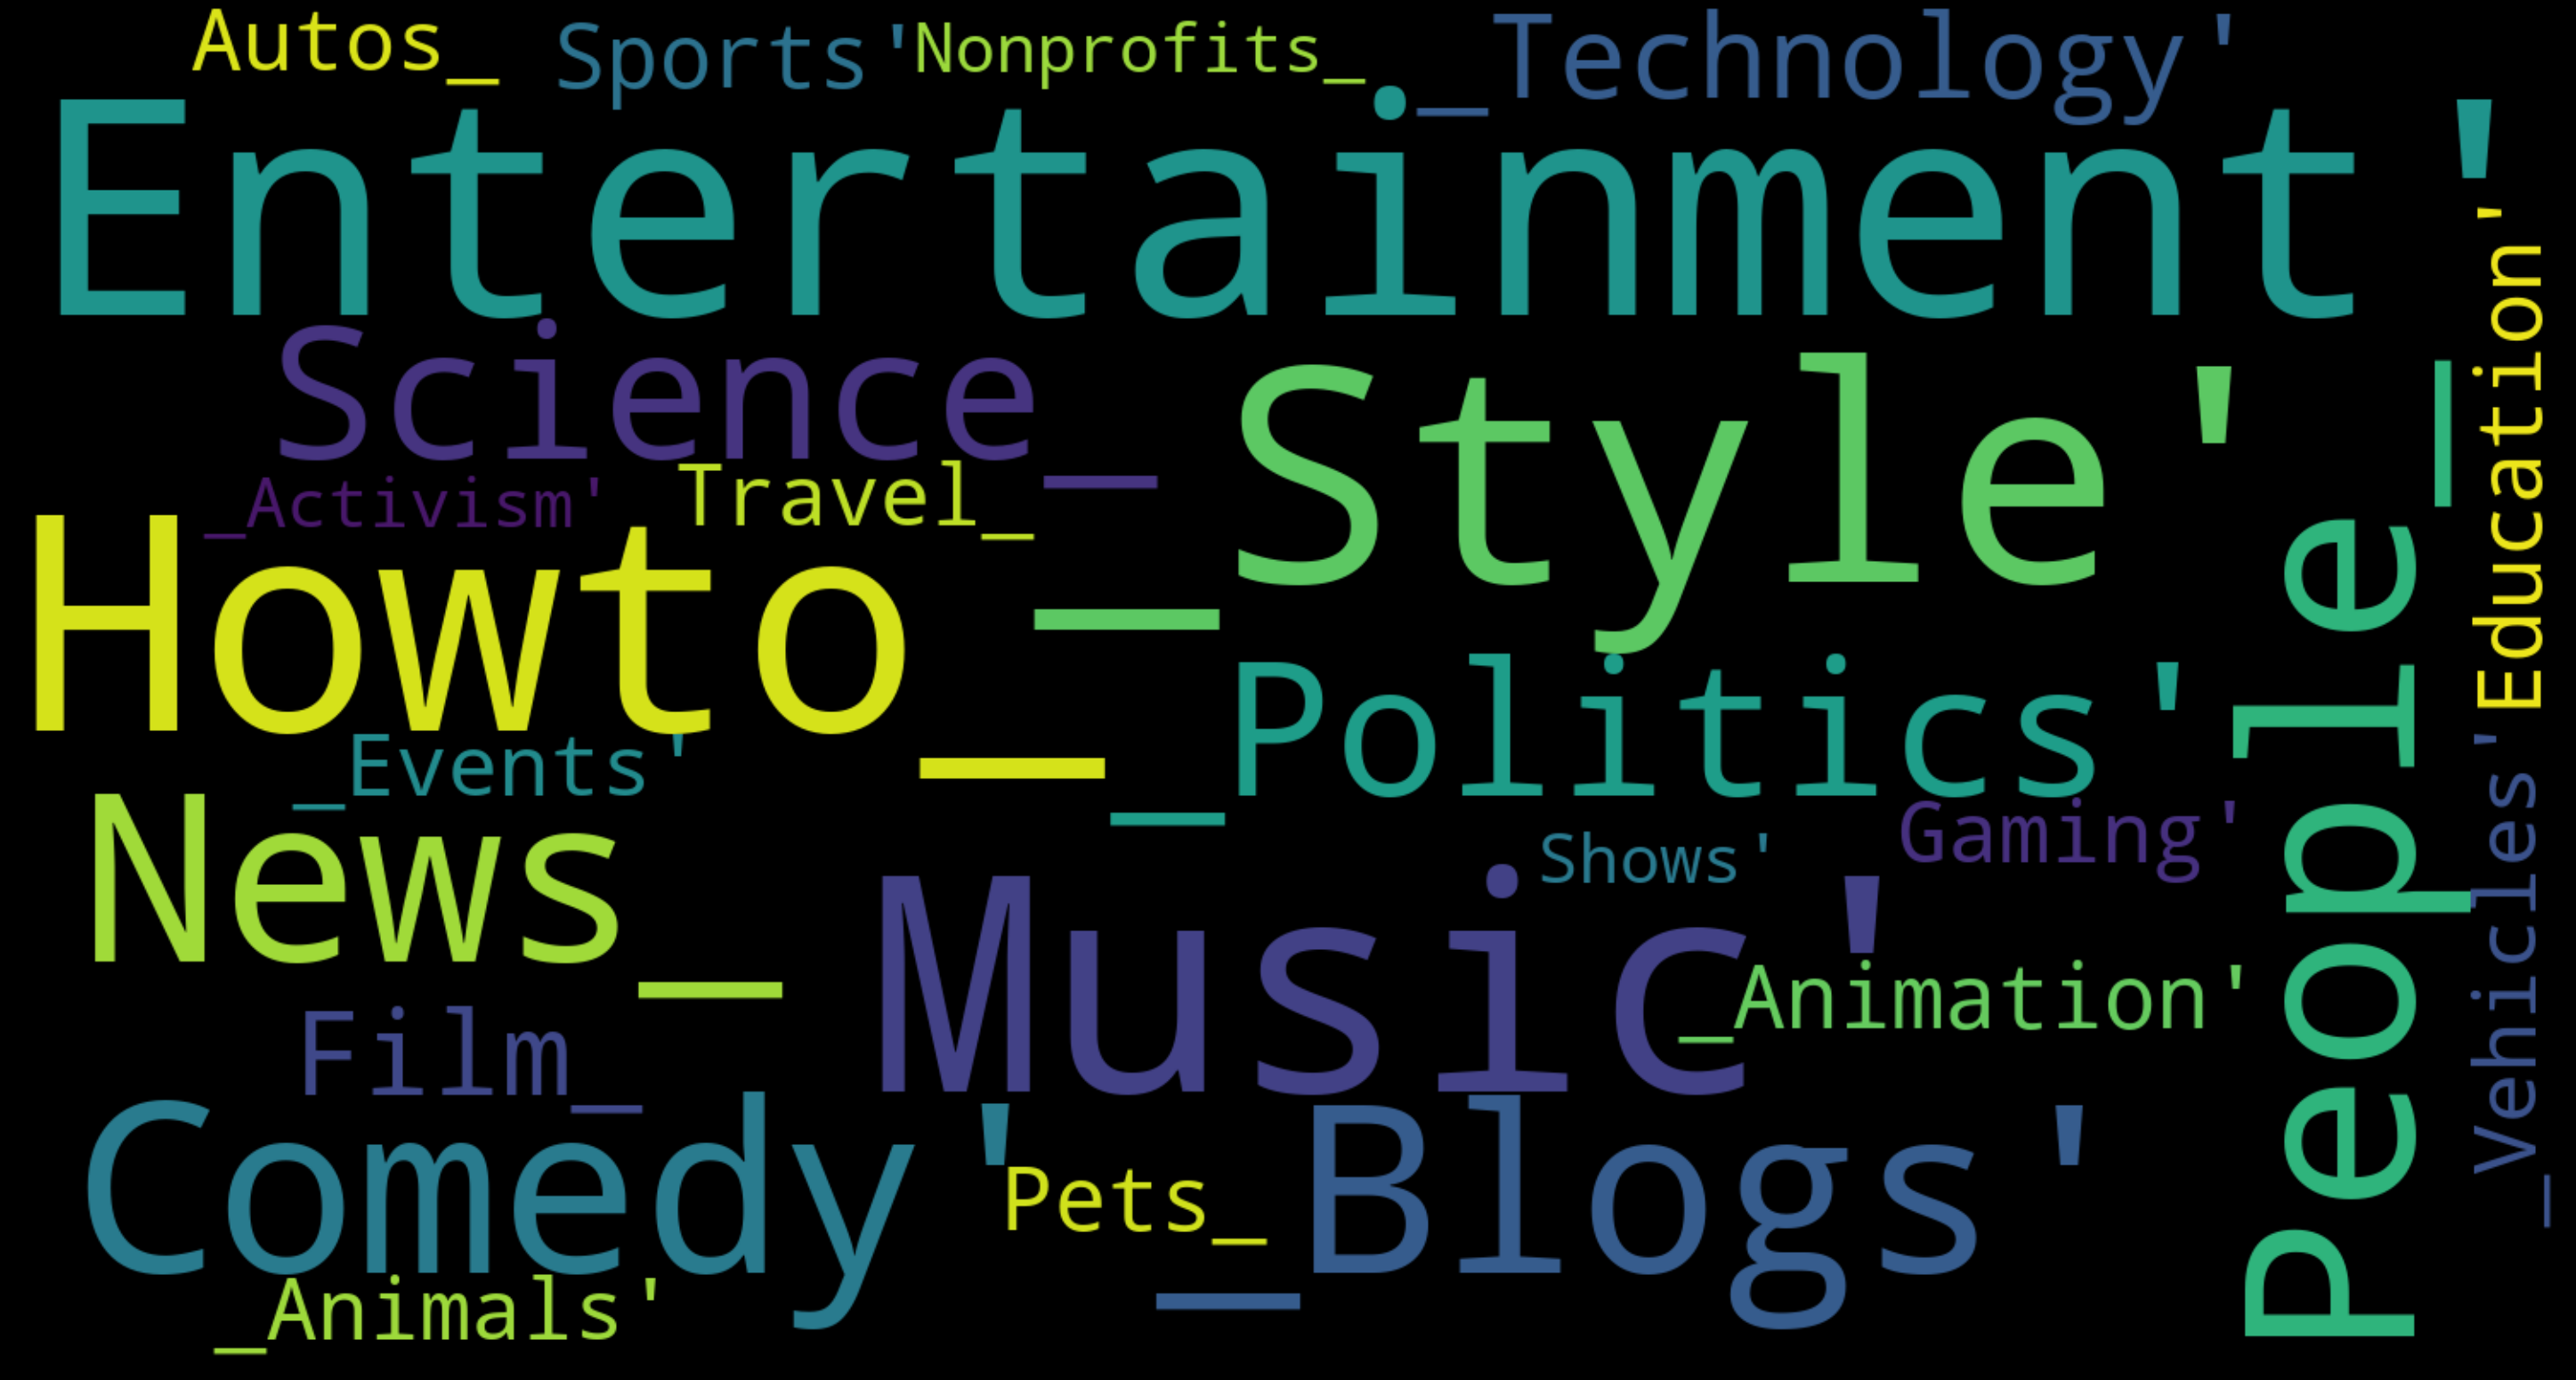

In [3]:
#to plot wordcloud for categories
import numpy as np
import pandas as pd
wc=pd.read_csv("D:\\Data intensive architecture\\output\\out1.csv")
#wc
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text = wc.Category.values
wordcloud = WordCloud(
    width = 1500,
    height = 800,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()